In [5]:
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

You should consider upgrading via the 'C:\Users\SHAIKH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [6]:
# Now import other necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn import tree

##improved one ##

In [12]:
pip install shap xgboost ucimlrepo pandas numpy scikit-learn matplotlib

     -------------------------------------- 544.9/544.9 KB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 5.0 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 KB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\SHAIKH\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7985
           1       0.43      0.86      0.57      1058

    accuracy                           0.85      9043
   macro avg       0.70      0.86      0.74      9043
weighted avg       0.92      0.85      0.87      9043



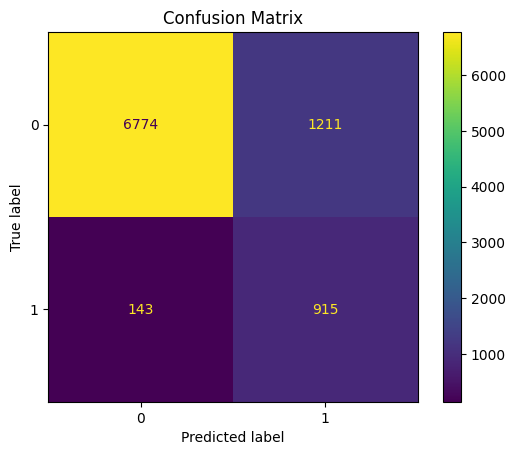

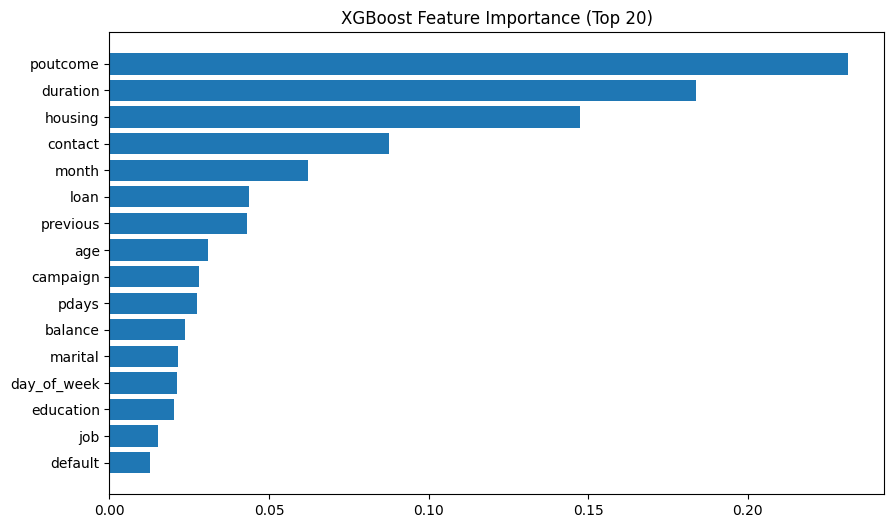

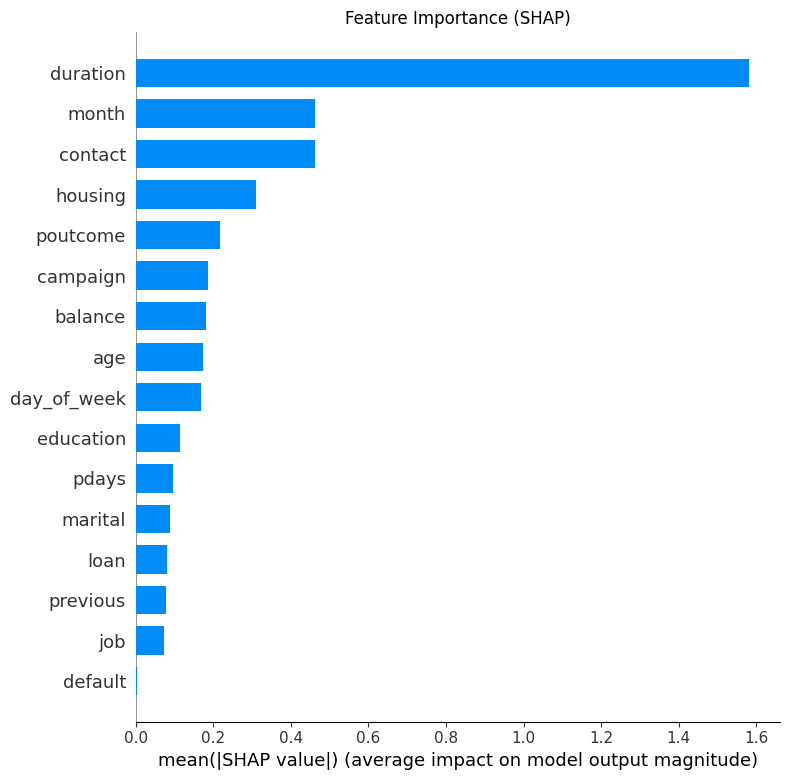

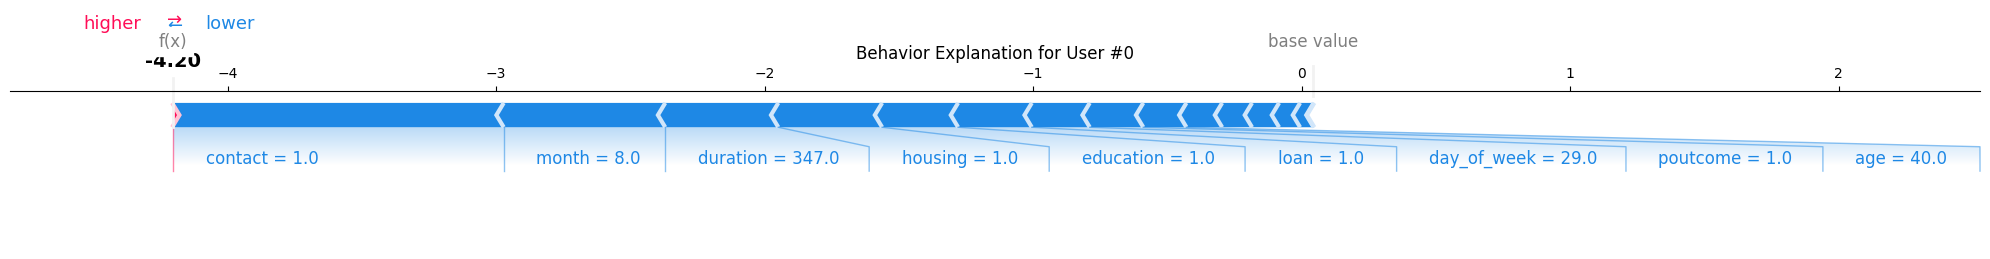

In [14]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Try to import shap (optional for feature importance)
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    print("SHAP library not installed. Feature importance plots will be limited.")
    SHAP_AVAILABLE = False

# Load and preprocess data
from ucimlrepo import fetch_ucirepo
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features.copy()
y = bank_marketing.data.targets['y'].map({'no':0, 'yes':1}).copy()

# Convert categorical features
cat_cols = ['job','marital','education','default','housing','loan',
            'contact','month','day_of_week','poutcome']
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col].astype(str))

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost with class weighting
model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1]),
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='aucpr'
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (built-in XGBoost)
plt.figure(figsize=(10,6))
sorted_idx = model.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][-20:], model.feature_importances_[sorted_idx][-20:])
plt.title("XGBoost Feature Importance (Top 20)")
plt.show()

# SHAP Explanations (if available)
if SHAP_AVAILABLE:
    try:
        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        
        # Global feature importance
        plt.figure()
        shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
        plt.title('Feature Importance (SHAP)')
        plt.tight_layout()
        plt.show()
        
        # Individual behavior explanations
        sample_idx = 0  # First test sample
        shap.force_plot(
            explainer.expected_value,
            shap_values[sample_idx,:],
            X_test.iloc[sample_idx,:],
            matplotlib=True,
            show=False
        )
        plt.title(f'Behavior Explanation for User #{sample_idx}')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"SHAP visualization failed: {str(e)}")

# Alternative feature importance if SHAP not available
if not SHAP_AVAILABLE:
    print("\nFor more detailed feature analysis, please install SHAP:")
    print("pip install shap")